<a href="https://colab.research.google.com/github/bhawna407/EXCEL-PROJECTS/blob/main/Quantanium%20Virtual%20Internship%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving QVI_transaction_data.py to QVI_transaction_data.py


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QVI_purchase_behaviour.py to QVI_purchase_behaviour.py


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving QVI_transaction_data.csv to QVI_transaction_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("QVI_purchase_behaviour.csv")   # use CSV file, not .py

# 1. Check if any nulls exist
print(df.isnull().values.any())

# 2. Count nulls in each column
print(df.isnull().sum())

# 3. Count total nulls in dataset
print(df.isnull().sum().sum())

# 4. Show only rows with null values
print(df[df.isnull().any(axis=1)])


False
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
0
Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [ ]:
# 1. Count total duplicate rows
print(df.duplicated().sum())

# 2. Show duplicate rows (if any)
print(df[df.duplicated()])

# 3. Drop duplicates (if needed)
df_clean = df.drop_duplicates()


0
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [ ]:
import pandas as pd

df = pd.read_csv("QVI_transaction_data.csv")   # use CSV file, not .py

# 1. Check if any nulls exist
print(df.isnull().values.any())

# 2. Count nulls in each column
print(df.isnull().sum())

# 3. Count total nulls in dataset
print(df.isnull().sum().sum())

# 4. Show only rows with null values
print(df[df.isnull().any(axis=1)])


False
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
0
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [ ]:
# 1. Count total duplicate rows
print(df.duplicated().sum())

# 2. Show duplicate rows (if any)
print(df[df.duplicated()])

# 3. Drop duplicates (if needed)
df_clean = df.drop_duplicates()


1
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845  10/1/2018        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
# convert QTY column to numeric
df["TOT_SALES"] = pd.to_numeric(df["TOT_SALES"], errors="coerce")


In [ ]:
# convert QTY column to numeric
df["PROD_QTY"] = pd.to_numeric(df["PROD_QTY"], errors="coerce")


In [ ]:
pd.set_option('display.max_rows', 100)
print(df)

              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       10/17/2018          1            1000       1         5   
2        5/20/2019          1            1343     383        61   
9        8/18/2018          7            7150    6900        52   
12       5/18/2019          9            9208    8634        15   
24       8/15/2018         38           38142   34181       108   
...            ...        ...             ...     ...       ...   
264830  11/12/2018        272          272319  270087        44   
264831    3/9/2019        272          272319  270088        89   
264833   11/6/2018        272          272379  270187        51   
264834  12/27/2018        272          272379  270188        42   
264835   9/22/2018        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
2         Smiths Crinkle Cut  Chips Chicken 170g 

In [ ]:
# Z score

outliers = []
def detect_outliers(data):
  threshold = 3 # 3rd standard deviation #
  mean = np.mean(data)
  std = np.std(data)


  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers



In [ ]:
detect_outliers(dataset)

[102, 107, 108]

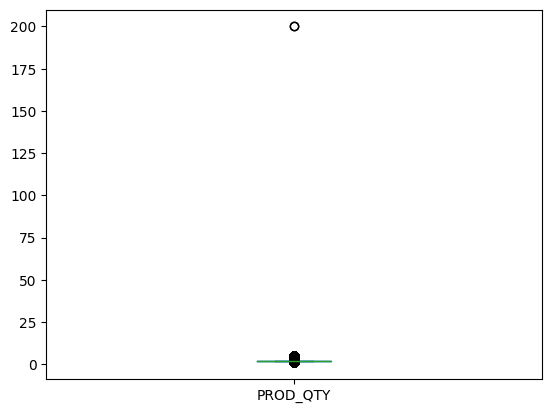

In [ ]:
import matplotlib.pyplot as plt
df["PROD_QTY"].plot(kind="box")
plt.show()

In [ ]:
Q1 = df["PROD_QTY"].quantile(0.25)
Q3 = df["PROD_QTY"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["PROD_QTY"] < (Q1 - 1.5 * IQR)) | (df["PROD_QTY"] > (Q3 + 1.5 * IQR))]

# Show only distinct outlier values
print(outliers["PROD_QTY"].unique())


[  3   5   1   4 200]


In [ ]:
Q1 = df["PROD_QTY"].quantile(0.25)
Q3 = df["PROD_QTY"].quantile(0.75)
IQR = Q3 - Q1

# keep only non-outliers
df = df[(df["PROD_QTY"] >= (Q1 - 1.5 * IQR)) & (df["PROD_QTY"] <= (Q3 + 1.5 * IQR))]

In [ ]:
Q1 = df["TOT_SALES"].quantile(0.25)
Q3 = df["TOT_SALES"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["TOT_SALES"] < (Q1 - 1.5 * IQR)) | (df["TOT_SALES"] > (Q3 + 1.5 * IQR))]

# Show only distinct outlier values
print(outliers["TOT_SALES"].unique())


[]
